### Import Dataset

In [4]:
import pandas as pd
import numpy as np 

In [5]:
test_pd = pd.read_csv("../datasets/fashion/fashion-mnist_test.csv")
train_pd = pd.read_csv("../datasets/fashion/fashion-mnist_train.csv")

### Pre Process Data

In [6]:
from tensorflow.keras.utils import to_categorical

test_label = test_pd["label"].to_numpy()
test = test_pd.drop(columns="label").to_numpy()
train_label = train_pd["label"].to_numpy()
train = train_pd.drop(columns="label").to_numpy()

train = train / 255
test = test / 255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

(60000, 28, 28, 1) (60000, 10) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define Model

In [7]:
import keras

model = keras.Sequential([])
model.add(keras.layers.Conv2D(64, kernel_size=(4,4), strides=[1,1], padding="valid", input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=[1,1] , padding="valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 12:01:00.164060: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 64)     │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,333,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,395,562 (16.77 MB)

 Trainable params: 4,395,370 (16.77 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model.fit(train, train_label, batch_size=128, epochs=10, validation_data=(test, test_label))

Epoch 1/10


2025-01-16 12:01:00.940276: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 304ms/step - accuracy: 0.6762 - loss: 0.9862 - val_accuracy: 0.8292 - val_loss: 0.5260
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 409ms/step - accuracy: 0.8596 - loss: 0.4089 - val_accuracy: 0.8837 - val_loss: 0.3253
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 329ms/step - accuracy: 0.8871 - loss: 0.3217 - val_accuracy: 0.8961 - val_loss: 0.2965
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 292ms/step - accuracy: 0.9020 - loss: 0.2779 - val_accuracy: 0.9024 - val_loss: 0.2680
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 313ms/step - accuracy: 0.9120 - loss: 0.2455 - val_accuracy: 0.9079 - val_loss: 0.2617
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 307ms/step - accuracy: 0.9216 - loss: 0.2226 - val_accuracy: 0.9109 - val_loss: 0.2560
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 314ms/step - accuracy: 0.9304 - loss: 0.1964 - val_accuracy: 0.9028 - val_loss: 0.2831
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 296ms/step - accuracy: 0.9407 - loss: 0.17

In [9]:
model.evaluate(test, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9145 - loss: 0.2380


[0.24179157614707947, 0.9157999753952026]

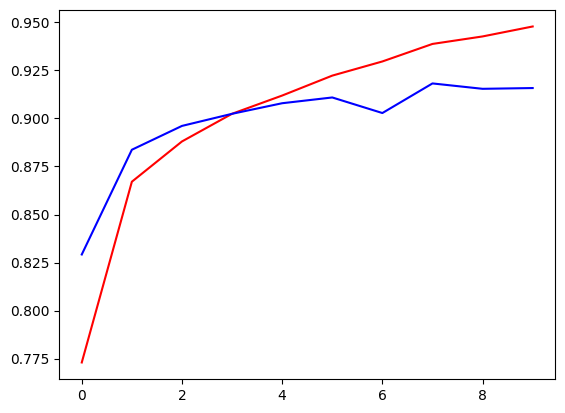

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()